### Summary

This jupyter notebook looks at general representation stats of tracks and artists in our 5 years of Billboard data (2003 to 2008). Specifically we calculate the Gini coefficient and concentration of the top 10% to benchmark against our Spotify data.

In [2]:
import pandas as pd
import numpy as np
import os, re
from datetime import date, timedelta
import matplotlib.pyplot as plt

from analysis_utils import gini

Start by getting all the entries in our 5 years of data

In [6]:
all_entries = []

for file in os.listdir('../billboard_data'):
    file_path = '../billboard_data/' + file
    df_temp = pd.read_csv(file_path)
    all_entries.append(df_temp)
    
df_all = pd.concat(all_entries)
df_all = df_all.iloc[:, 1:]

In [11]:
print('Our 5 years of Billboard data has a total of %d entries'%(len(df_all)))
print('Our 5 years of Billboard data has a total of %d unique artists'%(len(df_all.drop_duplicates('artist'))))
print('Our 5 years of Billboard data has a total of %d unique tracks'%(len(df_all.drop_duplicates('track'))))

Our 5 years of Billboard data has a total of 31300 entries
Our 5 years of Billboard data has a total of 1158 unique artists
Our 5 years of Billboard data has a total of 2101 unique tracks


### Gini Coefficient

#### Tracks

In [12]:
df_unique_tracks = df_all.drop_duplicates('track')

In [14]:
appearances = []

for index, row in df_unique_tracks.iterrows():   
    count = len(df_all[df_all['track'] == row['track']])
    if count != 0:
        appearances.append(count)

In [15]:
appearances_temp = np.asarray(appearances)
print('Gini coefficient for tracks in Billboard Hot 100 (2003 to 2008) is %f' % 
      gini(appearances_temp))

Gini coefficient for tracks in Billboard Hot 100 (2003 to 2008) is 0.378738


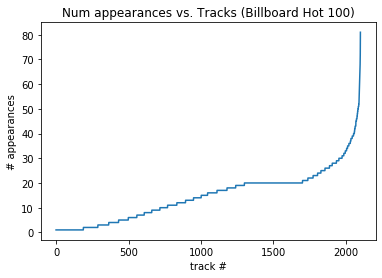

In [18]:
appearances_temp.sort()
plt.title('Num appearances vs. Tracks (Billboard Hot 100)')
plt.plot(appearances_temp)
plt.xlabel('track #')
plt.ylabel('# appearances')
plt.savefig('billboard_tracks.png', bbox_inches = 'tight')

#### Artists

In [19]:
df_unique_artists = df_all.drop_duplicates('artist')

In [20]:
appearances = []

for index, row in df_unique_artists.iterrows():   
    count = len(df_all[df_all['artist'] == row['artist']])
    if count != 0:
        appearances.append(count)

In [21]:
appearances_temp = np.asarray(appearances)
print('Gini coefficient for artists in Billboard Hot 100 (2003 to 2008) is %f' % 
      gini(appearances_temp))

Gini coefficient for artists in Billboard Hot 100 (2003 to 2008) is 0.552488


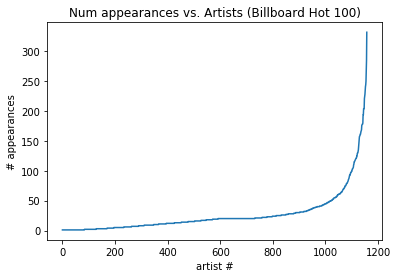

In [22]:
appearances_temp.sort()
plt.title('Num appearances vs. Artists (Billboard Hot 100)')
plt.plot(appearances_temp)
plt.xlabel('artist #')
plt.ylabel('# appearances')
plt.savefig('billboard_artists.png', bbox_inches = 'tight')

### Concentration of top 10%

#### Tracks

In [23]:
df_all_sorted = df_all.groupby(['track']).count()\
                .reset_index()\
                .sort_values(by='artist', ascending=False)

In [26]:
# get top 10%, then calculate the concentration of top 10%
top_10_num = int(len(df_all_sorted)/10)
top_10_df_all = df_all_sorted.iloc[:top_10_num, :]

top_10_conc = top_10_df_all['artist'].sum() / df_all_sorted['artist'].sum()
print('The concentration of the top 10 percent of tracks is %f' % 
      top_10_conc)

The concentration of the top 10 percent of tracks is 0.238850


#### Artists

In [27]:
df_all_sorted = df_all.groupby(['artist']).count()\
                .reset_index()\
                .sort_values(by='track', ascending=False)

In [28]:
# get top 10%, then calculate the concentration of top 10%
top_10_num = int(len(df_all_sorted)/10)
top_10_df_all = df_all_sorted.iloc[:top_10_num, :]

top_10_conc = top_10_df_all['track'].sum() / df_all_sorted['track'].sum()
print('The concentration of the top 10 percent of artists is %f' % 
      top_10_conc)

The concentration of the top 10 percent of artists is 0.432971
